In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
mpl.rcParams['axes.unicode_minus'] = False

# 分配表之編製

## 定性分配表之編製

In [2]:
index = ["國民黨", "民進黨", "新黨", "台聯黨", "建國黨", "其他"]
data = [80, 60, 10, 15, 5, 30]
df = pd.DataFrame(data = data, index = index, columns=["人數"])
df.index.name = "黨派"
df.pivot_table(
    index=["黨派"],
    values=["人數"], 
    margins=True,
    aggfunc=np.sum,
    margins_name="合計"
)

,人數
黨派,
其他,30
台聯黨,15
國民黨,80
建國黨,5
新黨,10
民進黨,60
合計,200


In [3]:
index = ["國民黨", "民進黨", "新黨", "台聯黨", "建國黨", "其他"]
data = {
    "男" : [35, 45, 6, 10, 2, 12],
    "女" : [45, 15, 4, 5, 3, 18]
}
df = pd.DataFrame(data = data, index = index)
df.index.name = "黨派"
pd.pivot_table(
    data=df,
    index=["黨派"],
    values=["男", "女"], 
    margins=True,
    aggfunc={
        "男" : np.sum,
        "女" : np.sum
    },
    margins_name="合計"
)

,女,男
黨派,,
其他,18,12
台聯黨,5,10
國民黨,45,35
建國黨,3,2
新黨,4,6
民進黨,15,45
合計,90,110


## 次數分配表之編製

In [4]:
df = pd.DataFrame({"data" : [75, 82, 60, 63, 35, 80, 61, 78, 71, 62, 72, 68, 51, 65, 53, 46, 70, 55, 31, 76, 59, 52, 64, 74, 79, 46, 69, 61, 74, 78, 49, 38, 71, 63, 49, 68, 66, 76, 73, 72, 80, 74, 58, 43, 60, 71, 41, 45, 53, 50, 66, 70, 59, 65, 76, 73, 64, 67, 82, 80]})
bins = pd.cut(x = df["data"], bins = 7)
df = df.groupby(bins).count()
df.index.name = "組界"
df.columns = ["組次數"]
df["以下累積"] = df["組次數"].cumsum()
df["以上累積"] = df.loc[::-1, "組次數"].cumsum()
df["相對次數"] = df["組次數"] / np.sum(df["組次數"])
df

,組次數,以下累積,以上累積,相對次數
組界,,,,
"(30.949, 38.286]",3,3,60,0.050000
"(38.286, 45.571]",3,6,57,0.050000
"(45.571, 52.857]",7,13,54,0.116667
"(52.857, 60.143]",8,21,47,0.133333
"(60.143, 67.429]",12,33,39,0.200000
"(67.429, 74.714]",15,48,27,0.250000
"(74.714, 82.0]",12,60,12,0.200000


# 統計圖表之編製

## 屬質資料之統計圖

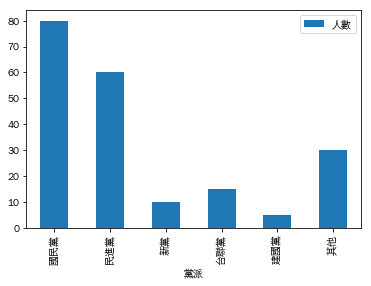

In [5]:
index = ["國民黨", "民進黨", "新黨", "台聯黨", "建國黨", "其他"]
data = [80, 60, 10, 15, 5, 30]
df = pd.DataFrame(data = data, index = index, columns=["人數"])
df.index.name = "黨派"
df.plot.bar()